In [171]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [172]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [173]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [174]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [7]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
raw_df.dropna(subset=["RainTomorrow"],inplace=True)

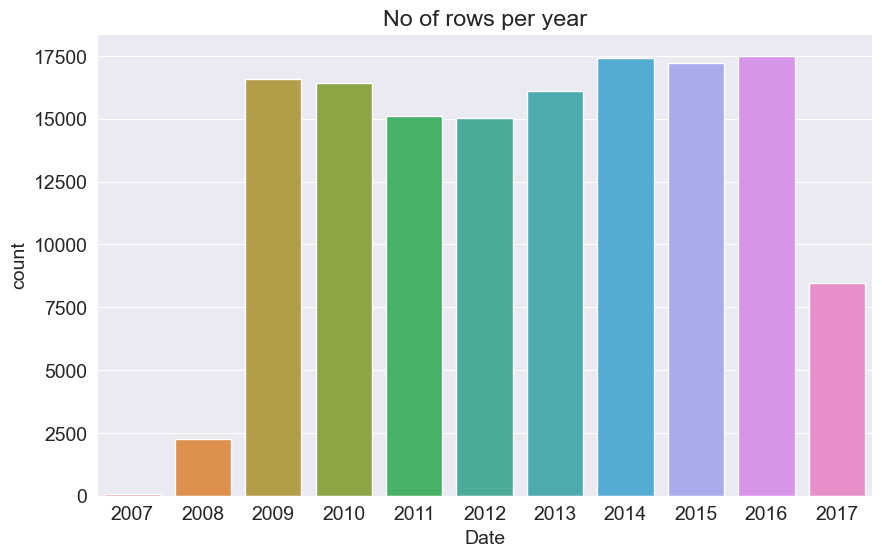

In [9]:
plt.title("No of rows per year")
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

Data til 2014 as training set, from 2015 as validation set, and from 2016 &2017 as test set

In [10]:
year=pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [11]:
input_cols=list(train_df.columns)[1:-1] #we dont want to use the last and first row
target_col="RainTomorrow"

In [12]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [13]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [14]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [15]:
train_inputs.select_dtypes(include=np.number).columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer=SimpleImputer(strategy="mean").fit(raw_df[numeric_cols])

In [19]:
#this will fill the data into the missing values
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [20]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
#we scale all thes feature values in the range of 0 to 1
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [23]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [24]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


Encoding categorical data

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
?OneHotEncoder

Init signature:
OneHotEncoder(
    *,
    categories='auto',
    drop=None,
    sparse_output=True,
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    min_frequency=None,
    max_categories=None,
    feature_name_combiner='concat',
)
Docstring:     
Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
encoding scheme. This creates a binary column for each category and
returns a sparse matrix or dense array (depending on the ``sparse_output``
parameter).

By default, the encoder derives the categories based on the unique values
in each feature. Alternatively, you can also specify the `categories`
manually.

This encoding is needed for feeding categorical data to many scikit-learn
estimators, notably linear models and SVMs with the standard kernels.

Note: a o

In [27]:
train_inputs[categorical_cols]=train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols]=val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols]=test_inputs[categorical_cols].fillna('Unknown')

In [28]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [29]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [30]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

C:\Users\Vedashree\AppData\Local\Temp\ipykernel_3812\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\Vedashree\AppData\Local\Temp\ipykernel_3812\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\Vedashree\AppData\Local\Temp\ipykernel_3812\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [31]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,Unknown,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [32]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

A decision tree represents a hierarchical series of binary decisions

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [33]:
from sklearn.tree import DecisionTreeClassifier
#we are using this cause it is a classification problem

In [34]:
model=DecisionTreeClassifier(random_state=42)

In [35]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

Lets evaluate the the decision tree using accuracy score

In [36]:
train_pred=model.predict(X_train)

In [37]:
#our targets also have yes/no  values
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
pd.value_counts(train_pred)

No     76707
Yes    22281
Name: count, dtype: int64

In [40]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [41]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [42]:
accuracy_score(train_pred,train_targets)

0.9999797955307714

Decision tree also returns probabilities for each prediction

In [43]:
train_probs=model.predict_proba(X_train)

In [44]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [45]:
accuracy_score(train_targets,train_pred)

0.9999797955307714

In [46]:
model.score(X_val,val_targets)

0.7928152747954268

In [47]:
val_targets.value_counts()/len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

In [48]:
# a model that predicted no everytime would be 78% accurate
#and our decision tree is 79%

Overfitting has happened

In [49]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.7, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Humidity3pm <= 0.512\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.3, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'WindGustSpeed <= 0.333\ngini = 0.478\nsampl

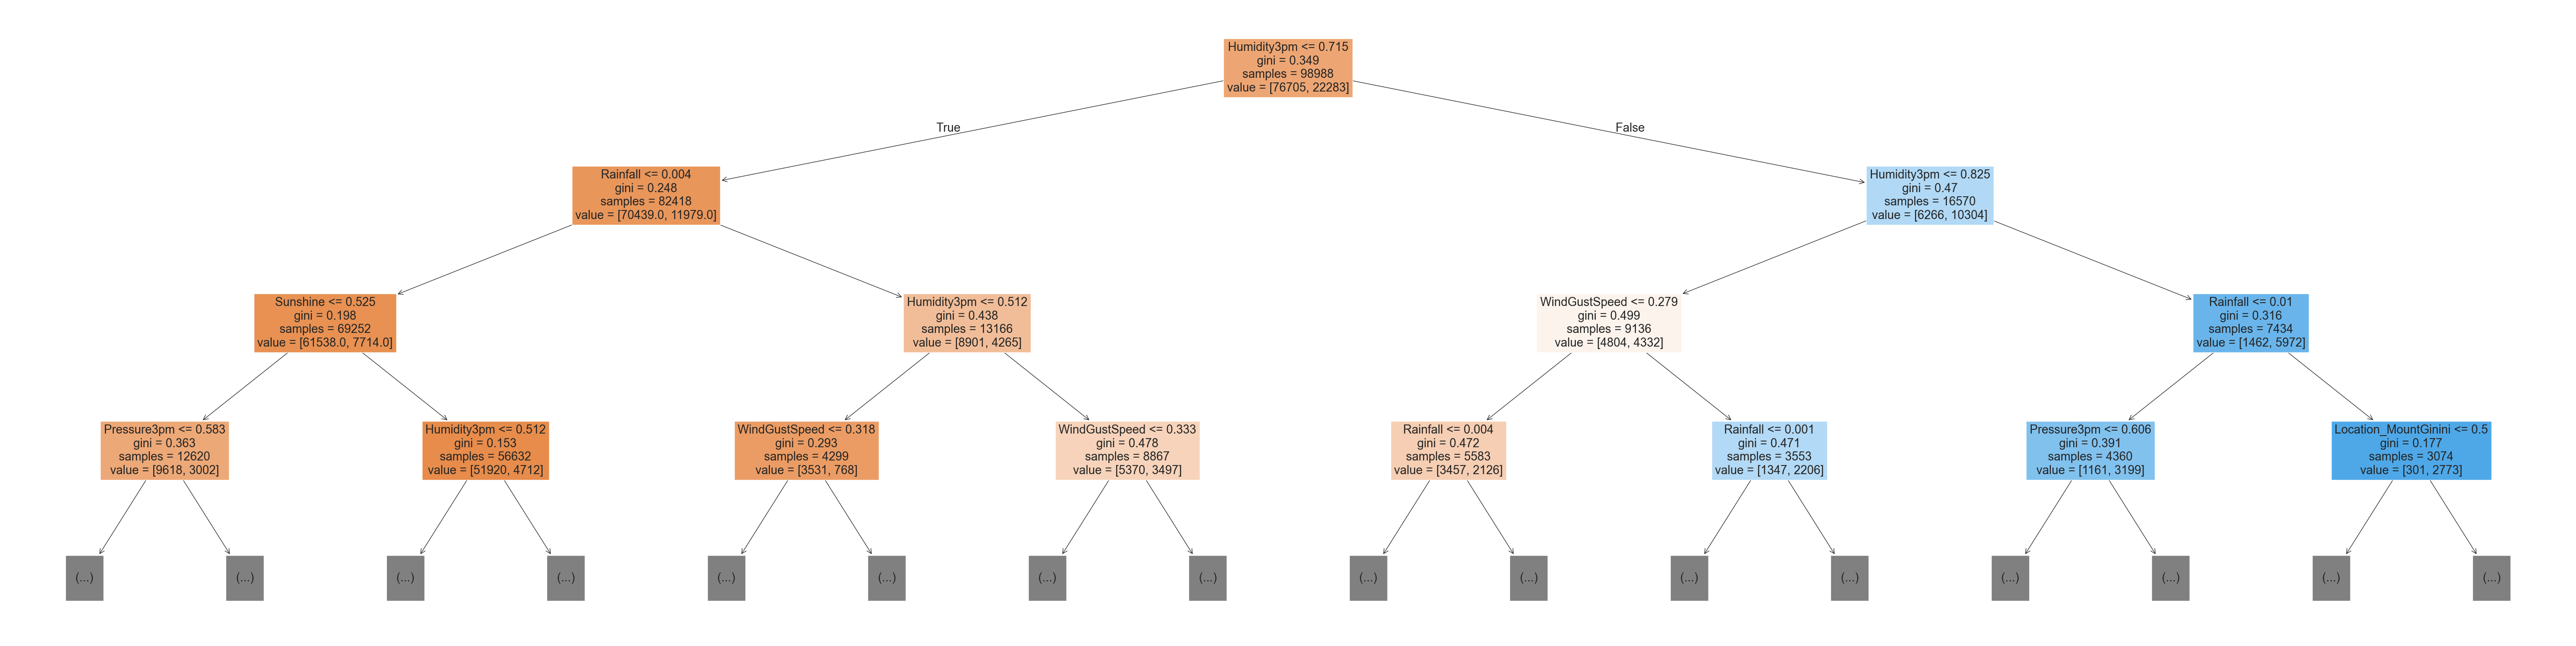

In [51]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=3,filled=True)

Gini score represents how good a certain split is
A lower gini score means a lower cost means a good split

In [52]:
model.tree_.max_depth

48

In [54]:
tree_text=export_text(model,max_depth=10,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

Feature IMportance

Based on the gini index computations, a decision tree assigns an importance value to each feature
These values can be used to interpret the results given by a decision tree

In [56]:
model.feature_importances_

array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

In [57]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)
    

In [59]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261666
11,Pressure3pm,0.062909
2,Rainfall,0.059698
5,WindGustSpeed,0.055278
4,Sunshine,0.049697
8,Humidity9am,0.039776
0,MinTemp,0.034395
14,Temp9am,0.033930
10,Pressure9am,0.033880
1,MaxTemp,0.032072


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

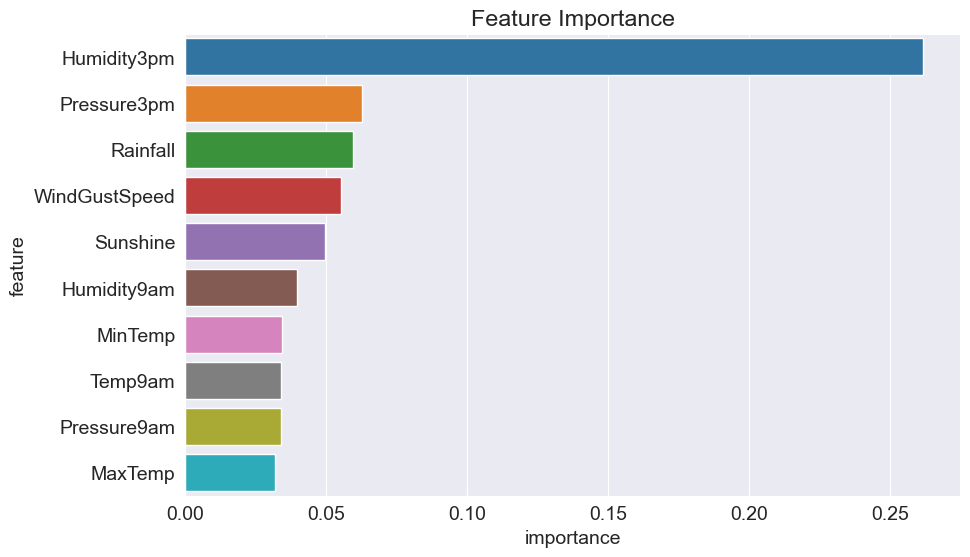

In [60]:
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

Hyperparameter Tuning and Overfitting

overfitting: doing very well on training data and poorly on validation data

Process of reducing overfitting: regularization

In [63]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

things that the model figures out: parameters.
things that are to be configured manually: hyperparameters


In [64]:
model=DecisionTreeClassifier(max_depth=3,random_state=43)

In [65]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=43)

in this decision tree we are not going 48 levels deep which was the masx depth, as it led to overfitting, we are going only 3 levels deep

In [68]:
model.score(X_train,train_targets)

0.8291308037337859

In [69]:
model.score(X_val,val_targets)

0.8334397307178921

In [70]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

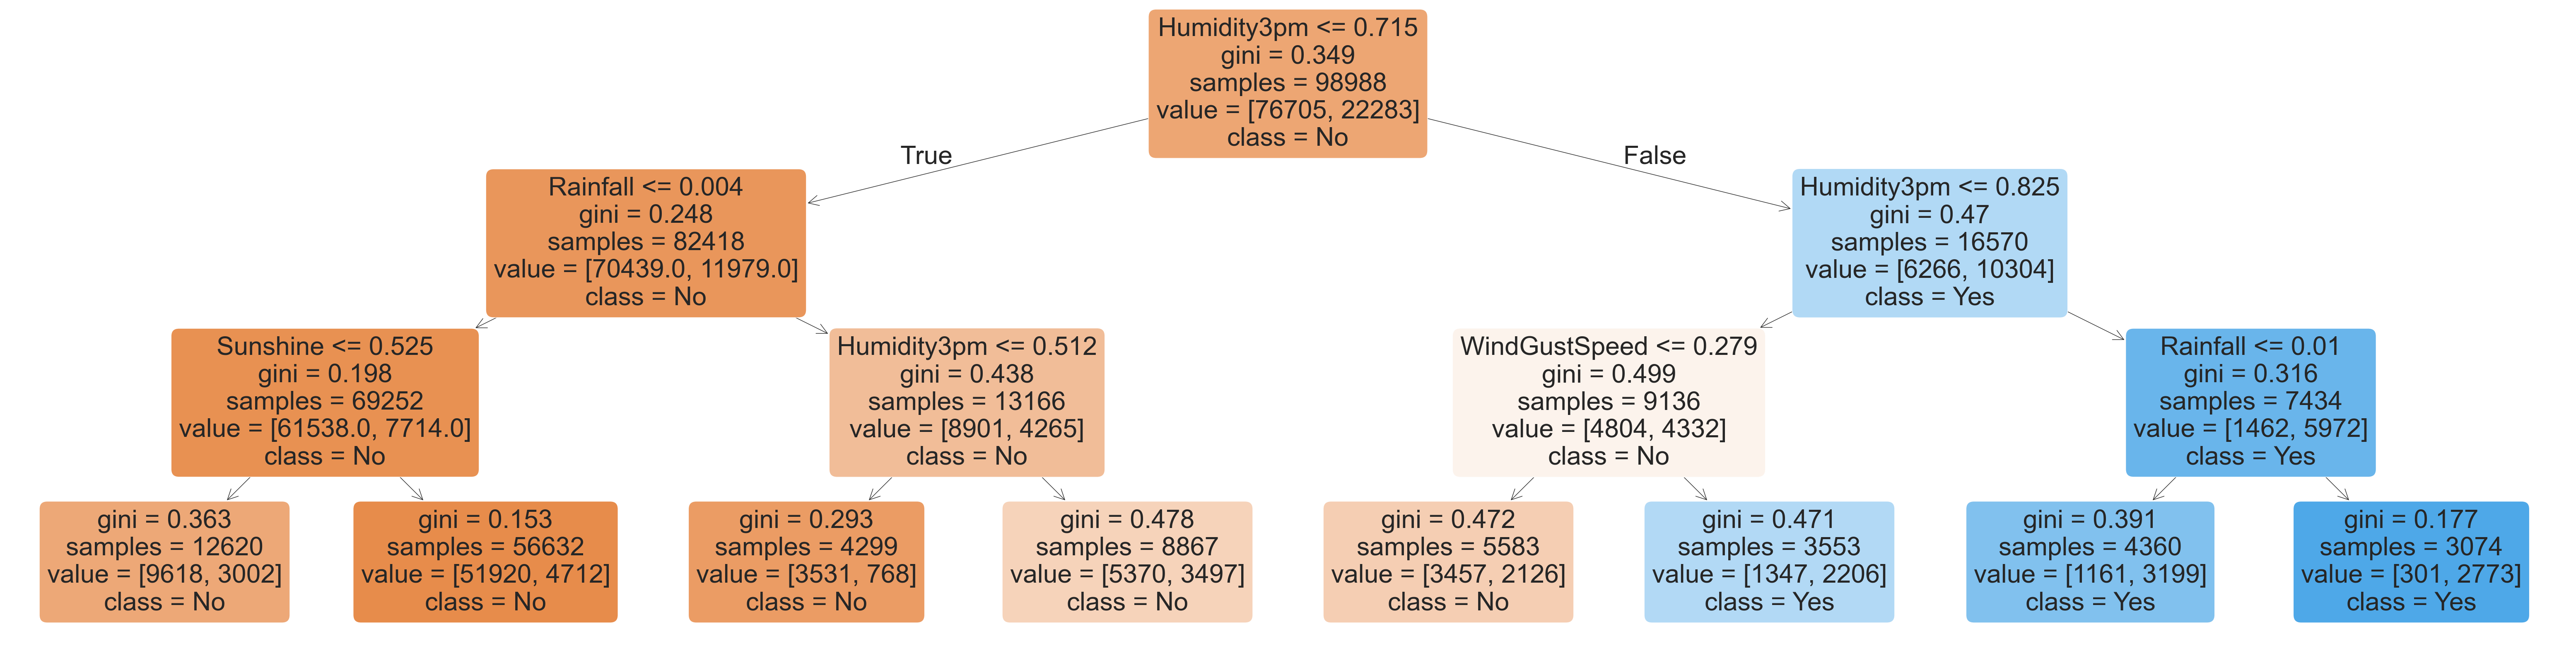

In [71]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,filled=True,rounded=True,class_names=model.classes_)

In [72]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [84]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,train_targets)
    train_error=1-model.score(X_train,train_targets)
    val_error=1-model.score(X_val,val_targets)
    return{'Max Depth':md,'Training error':train_error,'Validation error':val_error}

In [85]:
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [86]:
errors_df

,Max Depth,Training error,Validation error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157739
8,9,0.140916,0.156578
9,10,0.132966,0.157565


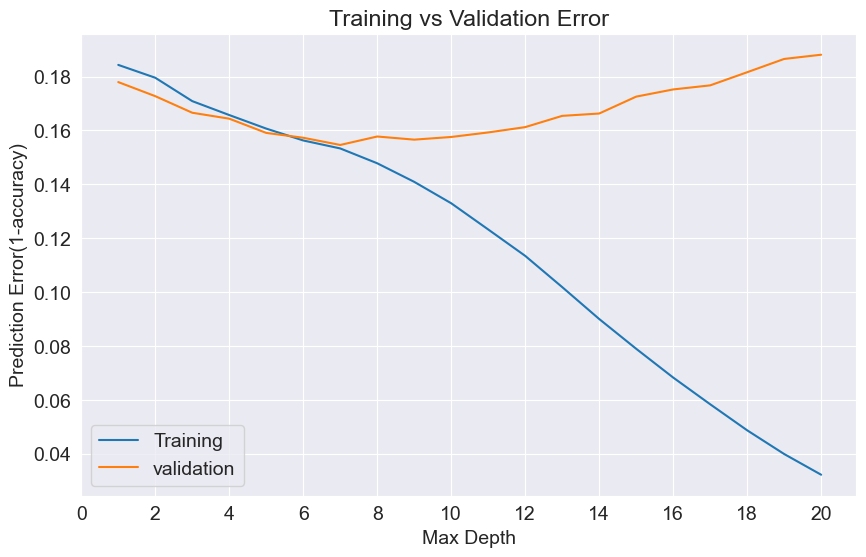

In [87]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training error'])
plt.plot(errors_df['Max Depth'],errors_df['Validation error'])
plt.title("Training vs Validation Error")
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel("Prediction Error(1-accuracy)")
plt.legend(["Training","validation"])

In [91]:
model=DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_targets)
#tuning the hyperparameter
model.score(X_val,val_targets),model.score(X_train,train_targets)

(0.8453949277465034, 0.8466884874934335)

Max leaf Nodes

Another way to control the size of a complexity of a decision tree is to limit the no of leaf nodes.
This allows branches of the trees to have varying depths

In [99]:
model=DecisionTreeClassifier(max_leaf_nodes=140,random_state=42).fit(X_train,train_targets)

In [100]:
model.score(X_train,train_targets)

0.848880672404736

In [101]:
model.score(X_val,val_targets)

0.8443502988799257

In [102]:
model.tree_.max_depth

12

In [104]:
model_text=export_text(model,feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

Another technique to reduce overfitting: Cost Complexity Pruning(less commonly used)

Training a Random Forest

A more effective strategy is to combine the results of several decision trees trained with slightly
different parameters. This is called a random forest model

Each decision tree will make different kinds of errors, and upon averaging, many of the errors will cancel out


In [105]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)

n_jobs allows the random forest to use multiple parallel workers to train decision trees

In [108]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [109]:
model.score(X_train,train_targets)

0.9999595910615429

In [110]:
model.score(X_val,val_targets)

0.8559572862863444

This time also the training accuracy is almost 100%, but the validation accuracy is much better.
This general technique of combining results of many models is called ensembling

In [113]:
train_probs=model.predict_proba(X_train)
train_probs

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [115]:
model.estimators_[0]  #we can access the individual decision trees using estimators_

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'RainToday_Unknown <= 0.5\ngini = 0.349\nsamples = 62610\nvalue = [76714, 22274]'),
 Text(0.25, 0.625, 'WindGustDir_ESE <= 0.5\ngini = 0.346\nsamples = 61968\nvalue = [76172, 21792]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Pressure3pm <= 0.502\ngini = 0.35\nsamples = 58780\nvalue = [71906, 20993]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.364\ngini = 0.266\nsamples = 3188\nvalue = [4266, 799]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Sunshine <= 0.438\ngini = 0.498\nsamples = 642\nvalue = [542, 482]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Location_Portland <= 0.5\ngini = 0.331\nsamples = 107\nvalue = [35, 132]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Cloud3pm <= 0.722\ngini = 0.483\nsamples = 535\nvalue = [507, 350]'),
 Text(0.8125, 0.125, '\n  (

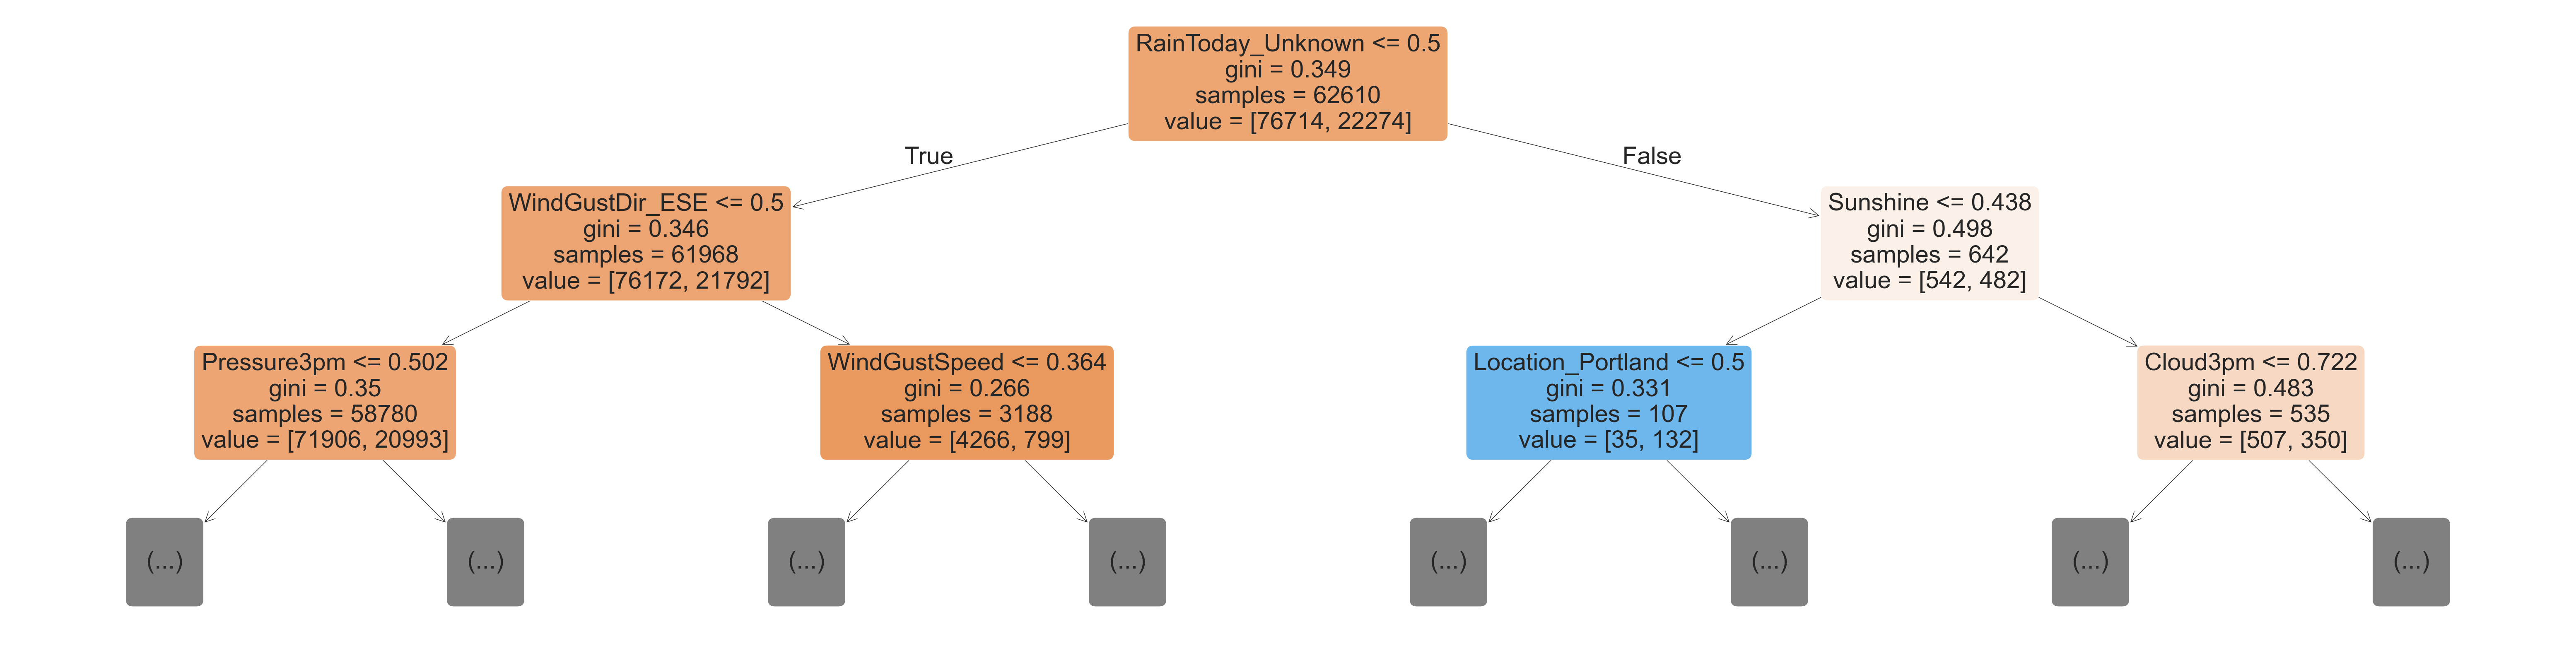

In [118]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True)

In [119]:
len(model.estimators_)

100

In [120]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)
    


In [121]:
importance_df

,feature,importance
9,Humidity3pm,0.133176
4,Sunshine,0.055553
11,Pressure3pm,0.052976
2,Rainfall,0.050488
10,Pressure9am,0.049379
8,Humidity9am,0.049261
5,WindGustSpeed,0.046640
15,Temp3pm,0.045179
1,MaxTemp,0.042172
0,MinTemp,0.041549


The distribution is a lot less skewed than that for a single decision tree

In [122]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [124]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,train_targets)

In [125]:
base_train_acc=base_model.score(X_train,train_targets)
base_val_acc=base_model.score(X_val,val_targets)

In [127]:
base_accs=base_val_acc,base_train_acc
base_accs

(0.8559572862863444, 0.9999595910615429)

n_estimators

This controls the no of decision trees in the forest. Default value is 100
Try to have as less estimators as  needed

In [128]:
#10 estimators
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)


In [129]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [130]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9873520022629005, 0.8441761940688295)

In [131]:
base_accs

(0.8559572862863444, 0.9999595910615429)

In [132]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=500)

In [133]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [135]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8572920898380825)

In [141]:
def n_estimators_error(n_est):
    model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=n_est)
    model.fit(X_train,train_targets)
    train_error=1-model.score(X_train,train_targets)
    val_error=1-model.score(X_val,val_targets)
    return{'N Estimators':n_est,'Training error':train_error,'Validation error':val_error}

In [145]:
# errors_df2=pd.DataFrame([n_estimators_error(n_est) for n_est in range(10,500,100)])

In [146]:
# plt.figure()
# plt.plot(errors_df2['N Estimators'],errors_df['Training error'])
# plt.plot(errors_df2['N Estimators'],errors_df['Validation error'])
# plt.title("Training vs Validation Error")
# # plt.xticks(range(10,500,100))
# plt.xlabel('N Estimators')
# plt.ylabel("Prediction Error(1-accuracy)")
# plt.legend(["Training","validation"])

In [147]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(X_train,train_targets)
    return model.score(X_train,train_targets),model.score(X_val,val_targets)

In [156]:
?**kwargs

In [157]:
test_params(max_depth=5)


(0.821847092576878, 0.8262433985259126)

In [158]:
test_params(max_depth=26)

(0.9820685335596234, 0.857001915152922)

In [159]:
test_params(max_leaf_nodes=2**5)

(0.8307572635066877, 0.8324531367883465)

In [160]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8567697754047937)

max_features

We can choose a fraction of the features for training a model

In [162]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

min_samples_split and min_samples_leaf

bootstrap

Bootstrapping helps the random forest generalize better, becauze each decision tree only sees a 
fraction of the training set and some rows randomly get higher weightage than others

In [163]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8558992513493123)

In [167]:
model=RandomForestClassifier(n_jobs=-1,
                             random_state=42,
                             max_features=20,
                             n_estimators=500,
                             max_depth=30,
                             class_weight={'No':1,'Yes':1.5})

                             

In [168]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [169]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9991312078231704, 0.8576402994602751)

In [170]:
model.score(X_test,test_targets)

0.8454223454223454